<a href="https://colab.research.google.com/github/MathiLogha/NaiveBayes/blob/main/NaiveBayes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

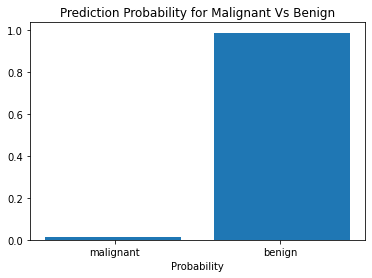

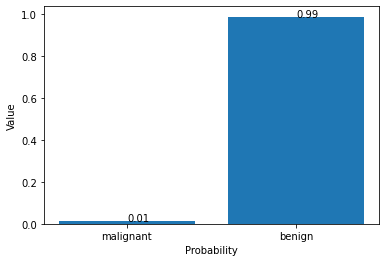

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Model specific Library
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

breast_cancer
breast_cancer.keys()
breast_cancer.data
breast_cancer.feature_names
breast_cancer.target
breast_cancer.target_names
df = pd.DataFrame(
    np.c_[breast_cancer.data, breast_cancer.target],
    columns = [list(breast_cancer.feature_names)+ ['target']]
                 )
df.head()
df.tail()
df.shape
df.describe()
df.info()

X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]
X.shape, y.shape

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 999)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

clf = GaussianNB()
clf.fit(X_train, y_train)

clf.score(X_val, y_val)

clf_mn = MultinomialNB()
clf_mn.fit(X_train, y_train)

clf_mn.score(X_val, y_val)

clf_b = BernoulliNB()
clf_b.fit(X_train, y_train)
clf_b.score(X_val, y_val)

pd.set_option('display.max_columns', None)
# print(df.iloc[99])
df[99:100]

patient1 = [14.42,19.77,94.48,642.5,0.09752,0.1141,0.09388,0.05839,0.1879,0.0639,0.2895,1.851,2.376,26.85,0.008005,0.02895,0.03321,0.01424,0.01462,0.004452,16.33,30.86,109.5,826.4,0.1431,0.3026,0.3194,0.1565,0.2718,0.09353]
patient1

patient1 = np.array([patient1])
patient1

clf.predict(patient1)

pred = clf.predict(patient1)

if pred[0] == 0:
    print("Patient is suffering from Cancer (Malignant Tumor)")
else:
    print("Patient has no Cancer (Benign)")

    pred_prob = clf.predict_proba(patient1)
pred_prob

pred_prob.ndim

pred_prob[0]

import matplotlib.pyplot as plt
import seaborn as sns

plt.bar(breast_cancer.target_names, pred_prob[0])
plt.title('Prediction Probability for Malignant Vs Benign')
plt.xlabel('Probability')
plt.xticks(pred_prob[0])
# plt.ylabel('y')
plt.show()

sns.barplot(y = pred_prob[0], x = breast_cancer.target_names)

line = plt.bar(breast_cancer.target_names,pred_prob[0])
plt.xlabel('Probability')
plt.ylabel("Value")

for i in range(2):
    plt.annotate(str(round(pred_prob[0][i],2)), xy=(breast_cancer.target_names[i],pred_prob[0][i]))

plt.show()